## Loading in Data and Packages 

In [21]:
import numpy as np
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt 
import pandas as pd
import scipy.stats
from scipy.stats import bootstrap
import scipy.interpolate as interpolate
from scipy.signal import correlate
from scipy.signal import correlation_lags
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
import statsmodels.api as sm

In [22]:
# reading in the files 
file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Variability (Abel)/'
side2_orig = pd.read_csv(file_path + 'OSU_Ice_full.csv')

file_path = '/Users/haley/Research/COLDEX/COLDEX/AllanHills_CMC1/AH Top Data (Phoenix)/'
side1_df = pd.read_csv(file_path + 'All_phoenix_data_simplified.csv')
side1_run1 = side1_df[0:265]
side1_run2 = side1_df[265:]

## Defining Stuff

In [23]:
## Defining variables 
side1_run1_depth = side1_run1['Depth']
side2_orig_depth = side2_orig['Depth']

side1_run1_dD = side1_run1['dD_vsmow']
side2_orig_dD = side2_orig['dD_vsmow']

side1_run1_d18O = side1_run1['d18O_vsmow']
side2_orig_d18O = side2_orig['d18O_vsmow']

side1_run1_dxs = side1_run1['dxs_vsmow']
side2_orig_dxs = side2_orig['dxs_vsmow']

In [24]:
# Defining each section 
side2_orig_207_3 = side2_orig[0:9]
side2_orig_208_8 = side2_orig[9:19]
side2_orig_207_7 = side2_orig[19:26]
side2_orig_207_6 = side2_orig[26:34]
side2_orig_207_5 = side2_orig[34:40]
side2_orig_204_5 = side2_orig[40:59]
side2_orig_209_7 = side2_orig[59:78]
side2_orig_209_8 = side2_orig[78:85]
side2_orig_201_2 = side2_orig[85:110]
side2_orig_209_3 = side2_orig[110:119]
side2_orig_208_3 = side2_orig[119:124]
side2_orig_207_1 =  side2_orig[124:142]
side2_orig_209_2 =  side2_orig[142:150]
side2_orig_210_2 = side2_orig[150:158]
side2_orig_203_2 = side2_orig[158:184]
side2_orig_203_3 = side2_orig[184:205]
side2_orig_204_4 = side2_orig[205:228]
side2_orig_201_4 = side2_orig[228:250]
side2_orig_207_9 = side2_orig[250:258]

# Dictionary when calling individual sections 
side2_sections = {
    "side2_orig_207_3": side2_orig[0:9],
    "side2_orig_208_8": side2_orig[9:19],
    "side2_orig_207_7": side2_orig[19:26],
    "side2_orig_207_6": side2_orig[26:34],
    "side2_orig_207_5": side2_orig[34:40],
    "side2_orig_204_5": side2_orig[40:59],
    "side2_orig_209_7": side2_orig[59:78],
    "side2_orig_209_8": side2_orig[78:85],
    "side2_orig_201_2": side2_orig[85:110],
    "side2_orig_209_3": side2_orig[110:119],
    "side2_orig_208_3": side2_orig[119:124],
    "side2_orig_207_1": side2_orig[124:142],
    "side2_orig_209_2": side2_orig[142:150],
    "side2_orig_210_2": side2_orig[150:158],
    "side2_orig_203_2": side2_orig[158:184],
    "side2_orig_203_3": side2_orig[184:205],
    "side2_orig_204_4": side2_orig[205:228],
    "side2_orig_201_4": side2_orig[228:250],
    "side2_orig_207_9": side2_orig[250:258]
}

side1_210_2 =  side1_run1[0:7]
side1_209_8 = side1_run1[7:16]
side1_209_7 = side1_run1[16:35]
side1_209_3 =  side1_run1[35:44]
side1_208_8 = side1_run1[44:54]
side1_208_3 = side1_run1[54:61]
side1_207_9 = side1_run1[61:70]
side1_207_7 = side1_run1[70:77]
side1_207_6 = side1_run1[77:81]
side1_207_5 = side1_run1[81:91]
side1_207_3 = side1_run1[91:102]
side1_207_1 = side1_run1[102:117]
side1_204_5 = side1_run1[117:141]
side1_204_4 = side1_run1[141:164]
side1_201_2 = side1_run1[164:190]
side1_201_4 = side1_run1[190:216]
side1_203_2 = side1_run1[216:242]
side1_203_3 = side1_run1[242:266]

# Dictionary when calling individual sections 
side1_sections = {
    "side1_210_2": side1_run1[0:7],
    "side1_209_8": side1_run1[7:16],
    "side1_209_7": side1_run1[16:35],
    "side1_209_3": side1_run1[35:44],
    "side1_208_8": side1_run1[44:54],
    "side1_208_3": side1_run1[54:61],
    "side1_207_9": side1_run1[61:70],
    "side1_207_7": side1_run1[70:77],
    "side1_207_6": side1_run1[77:81],
    "side1_207_5": side1_run1[81:91],
    "side1_207_3": side1_run1[91:102],
    "side1_207_1": side1_run1[102:117],
    "side1_204_5": side1_run1[117:141],
    "side1_204_4": side1_run1[141:164],
    "side1_201_2": side1_run1[164:190],
    "side1_201_4": side1_run1[190:216],
    "side1_203_2": side1_run1[216:242],
    "side1_203_3": side1_run1[242:266]
}


# side2_orig_207_9

## Plotting of entire dataset

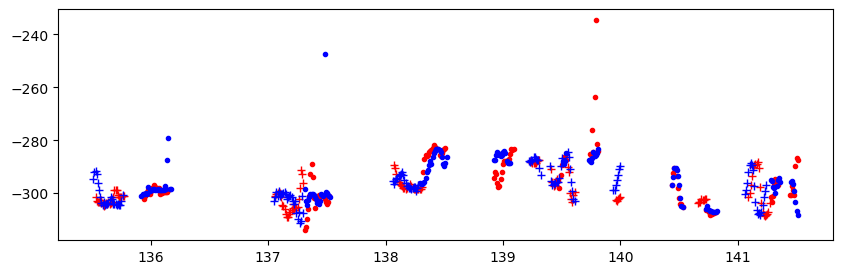

In [25]:
# normal matplotlib figure
variable = 'dD_vsmow'
plt.figure(figsize=(10, 3))

plt.plot(side2_orig_207_3['Depth'], side2_orig_207_3[variable], 'r+')
plt.plot(side2_orig_208_8['Depth'], side2_orig_208_8[variable], 'ro', markersize=3)
plt.plot(side2_orig_207_7['Depth'], side2_orig_207_7[variable], 'r+')
plt.plot(side2_orig_207_6['Depth'], side2_orig_207_6[variable], 'ro', markersize=3)
plt.plot(side2_orig_207_5['Depth'], side2_orig_207_5[variable], 'r+')
plt.plot(side2_orig_204_5['Depth'], side2_orig_204_5[variable], 'ro', markersize=3)
plt.plot(side2_orig_209_7['Depth'], side2_orig_209_7[variable], 'r+')
plt.plot(side2_orig_209_8['Depth'], side2_orig_209_8[variable], 'ro', markersize=3)
plt.plot(side2_orig_201_2['Depth'], side2_orig_201_2[variable], 'r+')
plt.plot(side2_orig_209_3['Depth'], side2_orig_209_3[variable], 'ro', markersize=3)
plt.plot(side2_orig_208_3['Depth'], side2_orig_208_3[variable], 'r+')
plt.plot(side2_orig_207_1['Depth'], side2_orig_207_1[variable], 'ro', markersize=3)
plt.plot(side2_orig_209_2['Depth'], side2_orig_209_2[variable], 'r+')
plt.plot(side2_orig_210_2['Depth'], side2_orig_210_2[variable], 'ro', markersize=3)
plt.plot(side2_orig_203_2['Depth'], side2_orig_203_2[variable], 'r+')
plt.plot(side2_orig_203_3['Depth'], side2_orig_203_3[variable], 'ro', markersize=3)
plt.plot(side2_orig_204_4['Depth'], side2_orig_204_4[variable], 'r+')
plt.plot(side2_orig_201_4['Depth'], side2_orig_201_4[variable], 'ro', markersize=3)
plt.plot(side2_orig_207_9['Depth'], side2_orig_207_9[variable], 'ro', markersize=3)


plt.plot(side1_207_3['Depth'], side1_207_3[variable], 'b+')
plt.plot(side1_208_8['Depth'], side1_208_8[variable], 'bo', markersize=3)
plt.plot(side1_207_7['Depth'], side1_207_7[variable], 'b+')
plt.plot(side1_207_6['Depth'], side1_207_6[variable], 'bo', markersize=3)
plt.plot(side1_207_5['Depth'], side1_207_5[variable], 'b+')
plt.plot(side1_204_5['Depth'], side1_204_5[variable], 'bo', markersize=3)
plt.plot(side1_209_7['Depth'], side1_209_7[variable], 'b+')
plt.plot(side1_209_8['Depth'], side1_209_8[variable], 'bo', markersize=3)
plt.plot(side1_209_3['Depth'], side1_209_3[variable], 'bo', markersize=3)
plt.plot(side1_208_3['Depth'], side1_208_3[variable], 'b+')
plt.plot(side1_207_1['Depth'], side1_207_1[variable], 'bo', markersize=3)
plt.plot(side1_210_2['Depth'], side1_210_2[variable], 'bo', markersize=3)
plt.plot(side1_203_2['Depth'], side1_203_2[variable], 'b+')
plt.plot(side1_203_3['Depth'], side1_203_3[variable], 'bo', markersize=3)
plt.plot(side1_204_4['Depth'], side1_204_4[variable], 'b+')
plt.plot(side1_201_4['Depth'], side1_201_4[variable], 'bo', markersize=3)
plt.plot(side1_201_2['Depth'], side1_201_2[variable], 'b+')
plt.plot(side1_207_9['Depth'], side1_207_9[variable], 'bo', markersize=3)

In [26]:
#interactive figure
isotope = 'dD'

p = figure(plot_width=900, plot_height=300, title=isotope +' vs depth', x_axis_label='Depth (m)', y_axis_label=isotope)


p.circle(side2_orig_207_3['Depth'], side2_orig_207_3[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_207_7['Depth'], side2_orig_207_7[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')# !!
p.triangle(side2_orig_207_5['Depth'], side2_orig_207_5[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')# !!
p.circle(side2_orig_209_7['Depth'], side2_orig_209_7[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_201_2['Depth'], side2_orig_201_2[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_208_3['Depth'], side2_orig_208_3[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_207_3['Depth'], side2_orig_207_3[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_209_2['Depth'], side2_orig_209_2[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_203_2['Depth'], side2_orig_203_2[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_204_4['Depth'], side2_orig_204_4[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')

p.triangle(side2_orig_208_8['Depth'], side2_orig_208_8[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.circle(side2_orig_207_6['Depth'], side2_orig_207_6[variable],size=3, color='red', legend_label='Sample Set #3 (OSU)')# !!
p.triangle(side2_orig_204_5['Depth'], side2_orig_204_5[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_209_8['Depth'], side2_orig_209_8[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_209_3['Depth'], side2_orig_209_3[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_207_1['Depth'], side2_orig_207_1[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_210_2['Depth'], side2_orig_210_2[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_203_3['Depth'], side2_orig_203_3[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_201_4['Depth'], side2_orig_201_4[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')
p.triangle(side2_orig_207_9['Depth'], side2_orig_207_9[variable],size=5, color='red', legend_label='Sample Set #3 (OSU)')


p.circle(side1_207_3['Depth'], side1_207_3[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_207_7['Depth'], side1_207_7[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')# !!
p.triangle(side1_207_5['Depth'], side1_207_5[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')# !!
p.circle(side1_209_7['Depth'], side1_209_7[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_201_2['Depth'], side1_201_2[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_208_3['Depth'], side1_208_3[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_207_3['Depth'], side1_207_3[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_203_2['Depth'], side1_203_2[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_204_4['Depth'], side1_204_4[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')

p.triangle(side1_207_9['Depth'], side1_207_9[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_208_8['Depth'], side1_208_8[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.circle(side1_207_6['Depth'], side1_207_6[variable],size=3, color='blue', legend_label='Sample Set #1 (UW)')# !!
p.triangle(side1_204_5['Depth'], side1_204_5[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_209_8['Depth'], side1_209_8[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_209_3['Depth'], side1_209_3[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_207_1['Depth'], side1_207_1[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_210_2['Depth'], side1_210_2[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_203_3['Depth'], side1_203_3[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')
p.triangle(side1_201_4['Depth'], side1_201_4[variable],size=5, color='blue', legend_label='Sample Set #1 (UW)')


p.legend.location = 'top_left'
p.legend.orientation = 'horizontal'

# Show the plot in the Jupyter Notebook
output_notebook()
show(p)

Loading BokehJS ...

## Individual Sections

In [27]:
## DEFINING VARIABLES YOU WANT TO LOOK AT 

depth = 'Depth' 
dD = 'dD_vsmow'
d18O = 'd18O_vsmow'
dxs = 'dxs_vsmow'

isotope = dD # this can be changed for other isotopes. Options are d18O, dxs, dD (defined by above lines) 
section = '208_8' # this can also be changed depending on what section you want to look at.  

In [28]:
# Depth and Isotope value definitions used in correlation matrix
depth2_o = side1_sections["side1_" + section][depth]
depth1_o = side2_sections["side2_orig_" + section][depth]

min_depth= min(depth1_o.min(), depth2_o.min())
max_depth = max(depth1_o.max(), depth2_o.max())

depth2 = depth2_o - min_depth
depth1 = depth1_o - min_depth
iso2 = side1_sections["side1_" + section][isotope]
iso1 = side2_sections["side2_orig_" + section][isotope]

Text(0.5, 1.0, 'Original Depth Section 208_8')

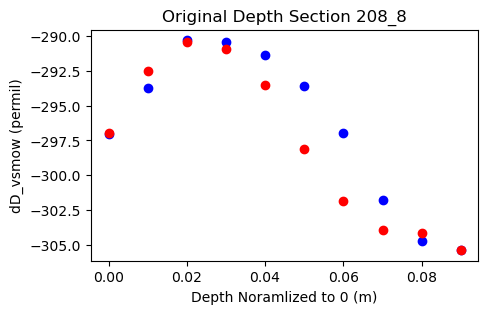

In [29]:
# Plotting Original Data from section
plt.figure(figsize=(5, 3))
plt.plot(depth2, iso2, 'bo', label='Sample Set #1')
plt.plot(depth1, iso1, 'ro', label='Sample Set #3') 
plt.xlabel('Depth Noramlized to 0 (m)') 
plt.ylabel(isotope + ' (permil)')
plt.title('Original Depth Section ' + section) 

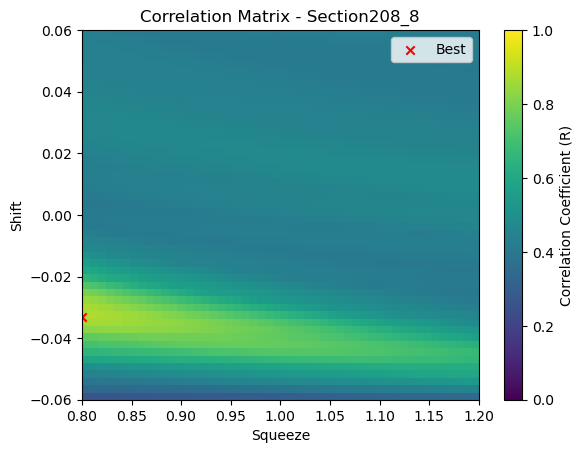

Best Shift: -0.0330612244897978
Best Squeeze: 0.8
Best Correlation Value: 0.8815543209200456


In [30]:
# Redefining this to match the interpolation code I used 

x = depth1 # sample section #3 depth (red) 
y = iso1 # sample section #3 isotope (red) 

# Making sure the code only looks at where data overlaps 

length_of_data = max_depth - min_depth 
max_shift = length_of_data - 0.03
shift_range = np.linspace(-max_shift, max_shift, 50)    
squeeze_range = np.linspace(0.8, 1.2, 50) # Adjust the range as needed

# Correlation Matrix Initialization and Code 

correlation_matrix = np.zeros((len(shift_range), len(squeeze_range)))

for i, shift in enumerate(shift_range):
    for j, squeeze in enumerate(squeeze_range):
        new_depth = (depth1 + shift) * squeeze

        xnew = new_depth
        ynew = np.interp(xnew, x, y)

        min_depth = np.max([np.min(xnew), np.min(depth2)])
        max_depth = np.min([np.max(xnew), np.max(depth2)])

        ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
        corr = max(ccf_values)
        correlation_matrix[i, j] = corr

max_corr_indices = np.unravel_index(np.argmax(correlation_matrix), correlation_matrix.shape)
best_shift = shift_range[max_corr_indices[0]]
best_squeeze = squeeze_range[max_corr_indices[1]]
best_corr = correlation_matrix[max_corr_indices]

# Plotting the correlation matrix
plt.imshow(correlation_matrix, extent=[squeeze_range[0], squeeze_range[-1], shift_range[0], shift_range[-1]],
           aspect='auto', origin='lower', vmin=0, vmax=1)
plt.colorbar(label='Correlation Coefficient (R)')
plt.xlabel('Squeeze')
plt.ylabel('Shift')
plt.title('Correlation Matrix - Section' + section)
plt.scatter(squeeze_range[max_corr_indices[1]], shift_range[max_corr_indices[0]], color='red', marker='x', label='Best')
plt.legend()
plt.show()

print(f"Best Shift: {best_shift}")
print(f"Best Squeeze: {best_squeeze}")
print(f"Best Correlation Value: {best_corr}")


Text(0.5, 1.0, 'Adjusted Depth Sec 208_8')

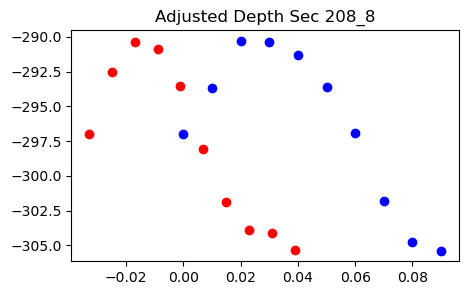

In [31]:
plt.figure(figsize=(5, 3))
plt.plot(depth2, iso2, 'bo') 
plt.plot((depth1*best_squeeze)+best_shift, iso1, 'ro') 
plt.title('Adjusted Depth Sec ' + section) 

## Additional Resources

Looking at the 2D matrix - just shift adjustments 

In [32]:
# Depth and Isotope value definitions used in correlation matrix
section = '208_8'
isotope = dD

depth2_o = side1_sections["side1_" + section][depth]
depth1_o = side2_sections["side2_orig_" + section][depth]

min_depth= min(depth1_o.min(), depth2_o.min())
max_depth = max(depth1_o.max(), depth2_o.max())

depth2 = depth2_o - min_depth
depth1 = depth1_o - min_depth
iso2 = side1_sections["side1_" + section][isotope]
iso1 = side2_sections["side2_orig_" + section][isotope]

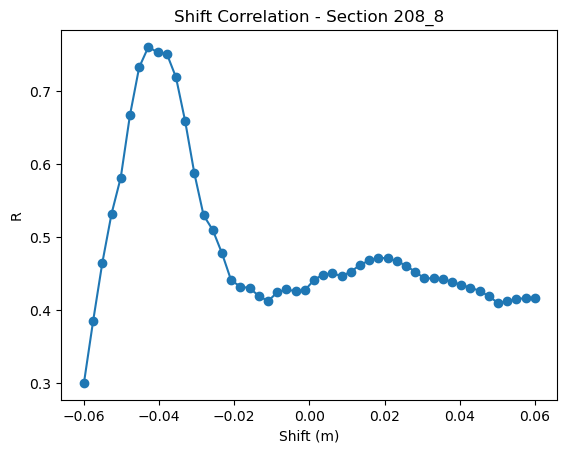

Value of 'change' that gives the biggest correlation value: -0.0428571428571453
Biggest correlation value: 0.7604921399024351


In [33]:
x = depth1
y = iso1

length_of_data = max_depth - min_depth # overlap 
max_shift = length_of_data - 0.03
change = np.linspace(-max_shift, max_shift, 50)  

correlation_values = []

for i in range(len(change)):
    new_depth = depth1 + change[i]
    
    xnew = new_depth
    ynew = np.interp(xnew, x, y)
    
    min_depth = np.min([np.min(xnew), np.min(x)])
    max_depth = np.max([np.max(xnew), np.max(x)])
    
    
    ccf_values = sm.tsa.stattools.ccf(iso2, ynew, adjusted=False)
    corr = max(ccf_values)
    correlation_values.append(corr)

# Plotting change against correlation values
plt.plot(change, correlation_values, marker='o', linestyle='-')
plt.xlabel('Shift (m)')
plt.ylabel('R')
plt.title('Shift Correlation - Section '+section)
plt.show()

max_corr_index = np.argmax(correlation_values)

# Get the corresponding value of 'change' that gives the maximum correlation
best_change = change[max_corr_index]
best_corr = correlation_values[max_corr_index]

print("Value of 'change' that gives the biggest correlation value:", best_change)
print("Biggest correlation value:", best_corr)

Text(0.5, 1.0, 'Shift ONLY Adjusted Depth Sec 208_8')

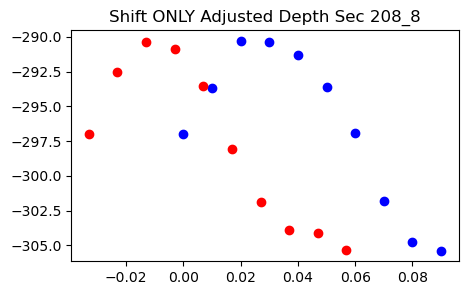

In [34]:
plt.figure(figsize=(5, 3))
plt.plot(depth2, iso2, 'bo') 
plt.plot((depth1)+best_shift, iso1, 'ro') 
plt.title('Shift ONLY Adjusted Depth Sec ' + section) 